# Tutorial: generating Siemens .dvs files for DWI acquisitions

In [1]:
import tempfile
import os
import numpy as np
from IPython.display import Image
from ukat.mapping.dwi import make_gradient_scheme
from ukat.utils.siemens import write_dvs

In [2]:
# File path for output .dvs file
OUTPUT_DIR = os.path.join(os.getcwd(), "siemens_write_dvs_output")
OUTPUT_PATH = os.path.join(OUTPUT_DIR, "ukrinmaps_13b_06dir_v2_prs")

# write_dvs() settings
NORMALIZATION = "none"
COORDINATE_SYSTEM = "prs"
COMMENT = "UKRIN-MAPS v2 (prs coordinate system), 20201121"

## Specify b-values and b-vectors, create a gradient scheme, and display it
The `bvals` and `bvecs` below generate the gradient scheme which is used to create the .dvs file which is used in the current UKRIN-MAPS diffusion acquisition protocol. These `bvecs` are the preset diffusion gradient directions on the Siemens MDDW mode when selecting number of directions = 6 (source: Siemens syngo MR E11 Operator Manual - Neuro p. 138).


In [3]:
bvals = [0, 5, 10, 20, 30, 40, 50, 70, 100, 200, 300, 400, 500, 800]
bvecs = [[1, 0, 1],
         [-1, 0, 1],
         [0, 1, 1],
         [0, 1, -1],
         [1, 1, 0],
         [-1, 1, 0]]

gradient_scheme = make_gradient_scheme(bvals, bvecs,
                                       normalize=True,
                                       one_bzero=True)
print(gradient_scheme)


 0.70710678          0.0   0.70710678      0
 0.70710678          0.0   0.70710678      5
 0.70710678          0.0   0.70710678     10
 0.70710678          0.0   0.70710678     20
 0.70710678          0.0   0.70710678     30
 0.70710678          0.0   0.70710678     40
 0.70710678          0.0   0.70710678     50
 0.70710678          0.0   0.70710678     70
 0.70710678          0.0   0.70710678    100
 0.70710678          0.0   0.70710678    200
 0.70710678          0.0   0.70710678    300
 0.70710678          0.0   0.70710678    400
 0.70710678          0.0   0.70710678    500
 0.70710678          0.0   0.70710678    800
-0.70710678          0.0   0.70710678      5
-0.70710678          0.0   0.70710678     10
-0.70710678          0.0   0.70710678     20
-0.70710678          0.0   0.70710678     30
-0.70710678          0.0   0.70710678     40
-0.70710678          0.0   0.70710678     50
-0.70710678          0.0   0.70710678     70
-0.70710678          0.0   0.70710678    100
-0.7071067

## Create the .dvs file and display it

In [4]:
dvs_path, dvs = write_dvs(gradient_scheme, OUTPUT_PATH,
                          normalization=NORMALIZATION,
                          coordinate_system=COORDINATE_SYSTEM,
                          comment=COMMENT)

print(dvs)

# -----------------------------------------------------
# .dvs file for the following setup:
# b-val (s/mm2)  # directions
# 0              1
# 5              6
# 10             6
# 20             6
# 30             6
# 40             6
# 50             6
# 70             6
# 100            6
# 200            6
# 300            6
# 400            6
# 500            6
# 800            6
# -----------------------------------------------------

[directions=79]
Normalization = none
CoordinateSystem = prs
Comment = UKRIN-MAPS v2 (prs coordinate system), 20201121

Vector[0] = ( 0.000000, 0.000000, 0.000000 )
Vector[1] = ( 0.055902, 0.000000, 0.055902 )
Vector[2] = ( 0.079057, 0.000000, 0.079057 )
Vector[3] = ( 0.111803, 0.000000, 0.111803 )
Vector[4] = ( 0.136931, 0.000000, 0.136931 )
Vector[5] = ( 0.158114, 0.000000, 0.158114 )
Vector[6] = ( 0.176777, 0.000000, 0.176777 )
Vector[7] = ( 0.209165, 0.000000, 0.209165 )
Vector[8] = ( 0.250000, 0.000000, 0.250000 )
Vector[9] = ( 0.353553, 0.0000

# Installing and enabling .dvs files

To use the directions defined by the .dvs file from this example:

1. Install (copy) the .dvs file to `%CustomerSeq%/DiffusionVectorSets` (usually `C:\MedCom\MriCustomer\seq\DiffusionVectorSets\` on the host).
2. Import it in the diffusion tab by selecting Diffusion Mode: Free and clicking the `...` next to it.
3. On the UI, specify only the highest b-value (800 $s/mm^2$ in this example).

The diffusion weightings (b-values) of all measurements will be calculated as $b_{actual}=b_{UI} \times magnitude_{actual}^2/magnitude_{max}^2$ (source: Siemens syngo MR E11 Operator Manual - Neuro p. 141), where $b_{UI}$ is the highest b-value selected in the diffusion tab (800 $s/mm^2$ in this example). See below for a screenshot of the diffusion tab of a protocol using the .dvs file generated in this example.


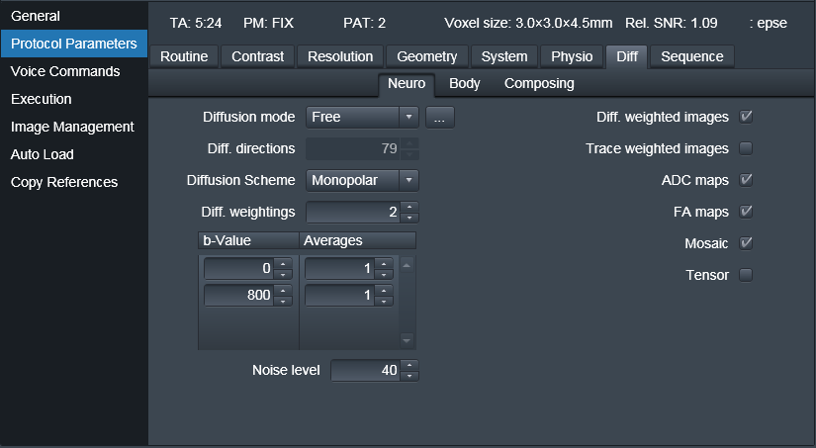

In [5]:
Image(filename="siemens_write_dvs_output/diffusion_tab.png")